Optimization terminated successfully.
         Current function value: 1.283688
         Iterations: 77
         Function evaluations: 147


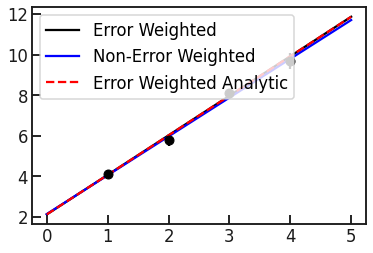

In [1]:
import numpy as np
from scipy.optimize import fmin
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4])
y = np.array([4.1, 5.8, 8.1, 9.7])
dy = np.array([0.2, 0.3, 0.2, 0.4])

# Calculate Chi^2 function to minimize
def chi_2(params, x, y, sigy):
    m, c = params
    return sum(((y - m * x - c) / sigy) ** 2)


data_in = (x, y, dy)
params0 = [1, 0]

q = fmin(chi_2, params0, args=data_in)

# Unweighted fit to compare

a = np.polyfit(x, y, deg=1)

# Analytic solution
sx = sum(x / dy ** 2)
sx2 = sum(x ** 2 / dy ** 2)
s1 = sum(1.0 / dy ** 2)
sy = sum(y / dy ** 2)
sxy = sum(x * y / dy ** 2)

ma = (s1 * sxy - sx * sy) / (s1 * sx2 - sx ** 2)
ba = (sx2 * sy - sx * sxy) / (sx2 * s1 - sx ** 2)

xplt = np.linspace(0, 5, 100)
yplt1 = xplt * q[0] + q[1]


yplt2 = xplt * a[0] + a[1]

yplt3 = xplt * ma + ba

plt.figure()
plt.plot(xplt, yplt1, label="Error Weighted", color="black")
plt.plot(xplt, yplt2, label="Non-Error Weighted", color="blue")
plt.plot(xplt, yplt3, label="Error Weighted Analytic", linestyle="--", color="red")
plt.errorbar(x, y, yerr=dy, fmt="ko")
plt.legend()
plt.show()

In [ ]:
'